## Plots of resonance/novelty

In [1]:
import pandas as pd
import os

In [2]:
## functions from Maris' code ##
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)

    return fig, ax1

In [13]:
filename = os.path.join("..","idmdl", "tweets_recol_emotion_date_hour_12.csv")
# filename = os.path.join("..", "idmdl", "tweets_polarity_date.csv")
# filename = os.path.join("idmdl", "news_emotion_date_non_tabloid.csv")

# filename = os.path.join("..", "idmdl", "tweets_emotion_date_W7.csv")
# filename = os.path.join("..", "idmdl", "tweets_polarity_date_W7.csv")

df = pd.read_csv(filename)

df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma
0,2019-01-01 00:00:00,"[0.22787643312101907, 0.17345222929936302, 0.2...",0.0,0.016382,0.0,0.0,0.006825,0.0
1,2019-01-01 01:00:00,"[0.20476406533575314, 0.19237568058076224, 0.2...",0.0,0.013592,0.0,0.0,0.005011,0.0
2,2019-01-01 02:00:00,"[0.2598533333333333, 0.143392, 0.3081493333333...",0.0,0.017173,0.0,0.0,0.004838,0.0
3,2019-01-01 03:00:00,"[0.18962424242424245, 0.14878787878787877, 0.3...",0.0,0.016148,0.0,0.0,0.005593,0.0
4,2019-01-01 04:00:00,"[0.1593333333333333, 0.14023737373737372, 0.22...",0.0,0.010995,0.0,0.0,0.002931,0.0


In [14]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
# event_dict is a dictionary of the events to be plotted
event_dict = {"first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              # "christmas": dt.datetime(2020, 12, 24),
              # "new year": dt.datetime(2020, 12, 31),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
            #   "coronapas launced": dt.datetime(2021, 5, 27),
              # "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              # "all restrictions lifted": dt.datetime(2021, 9, 10),
              "somalian funeral": dt.datetime(2020, 7, 31)
              }


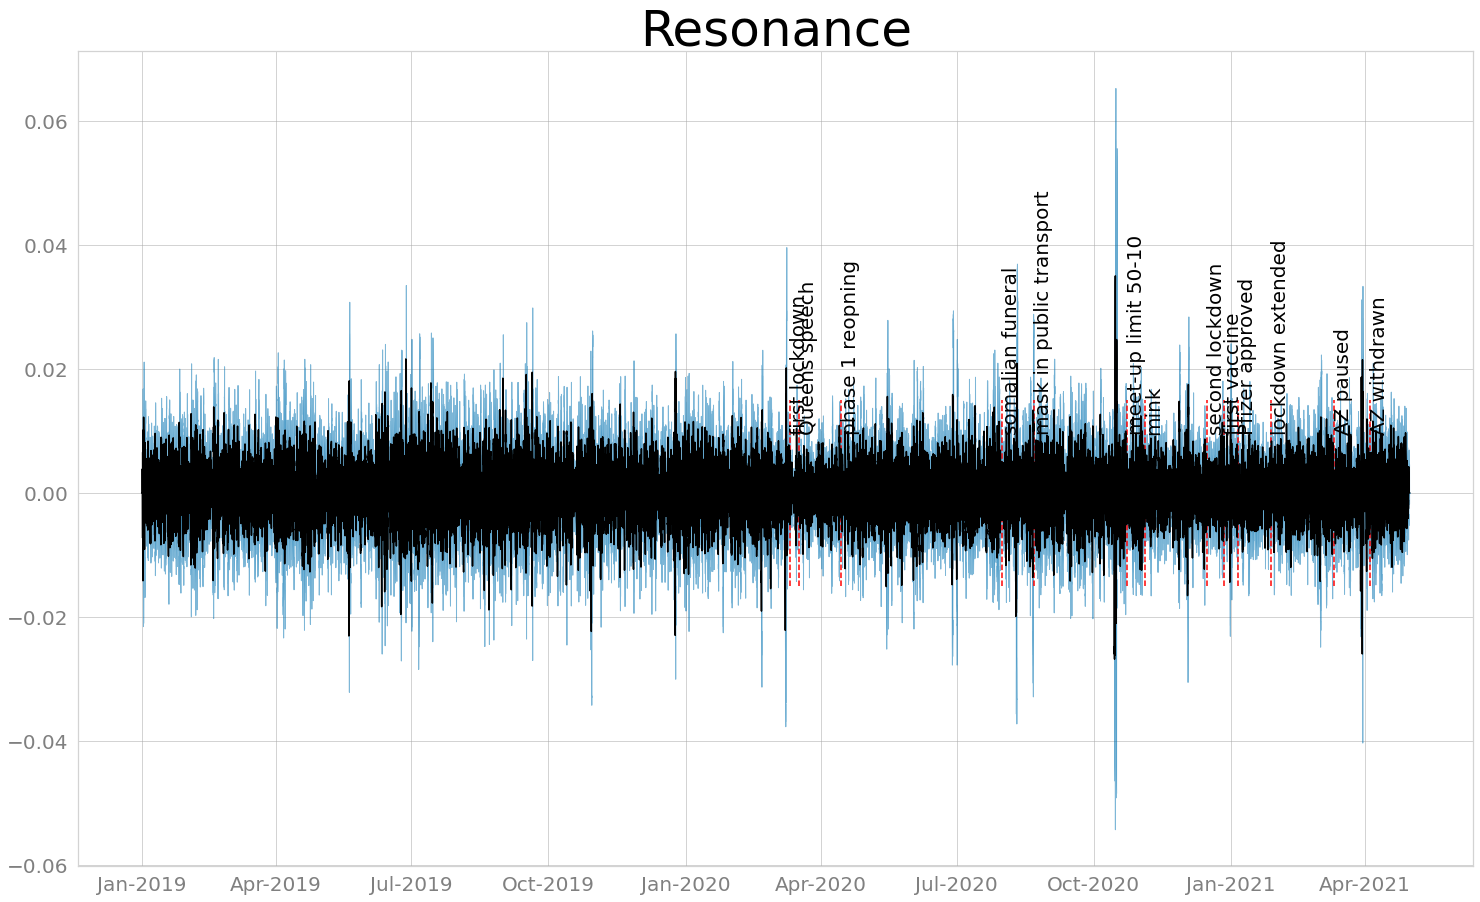

In [6]:
fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

x = df['date']
y = df['resonance']
error = df['rsigma']

plt.plot(x, y, color=palette[0])
plt.fill_between(x, y-error, y+error,
                 alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

for event, time in event_dict.items():
    plt.vlines(x = time, ymax=0.015, ymin=-0.015, colors='Red',
               label = event, linestyle = 'dashed')
    plt.text(x = time, y = 0.010,
         s = event,
         fontdict = dict(color="black",size=20),
        #  bbox = dict(facecolor="white",alpha=0.5), 
         rotation=90)

fig, ax1 = set_late_plot_settings(if_dates = True)
ax1.set_title("Resonance", fontdict = {'fontsize':50}, color = "Black")
# plt.xticks(rotation=60)

# plt.savefig('../fig/recol_resonance_events.png')
plt.show()

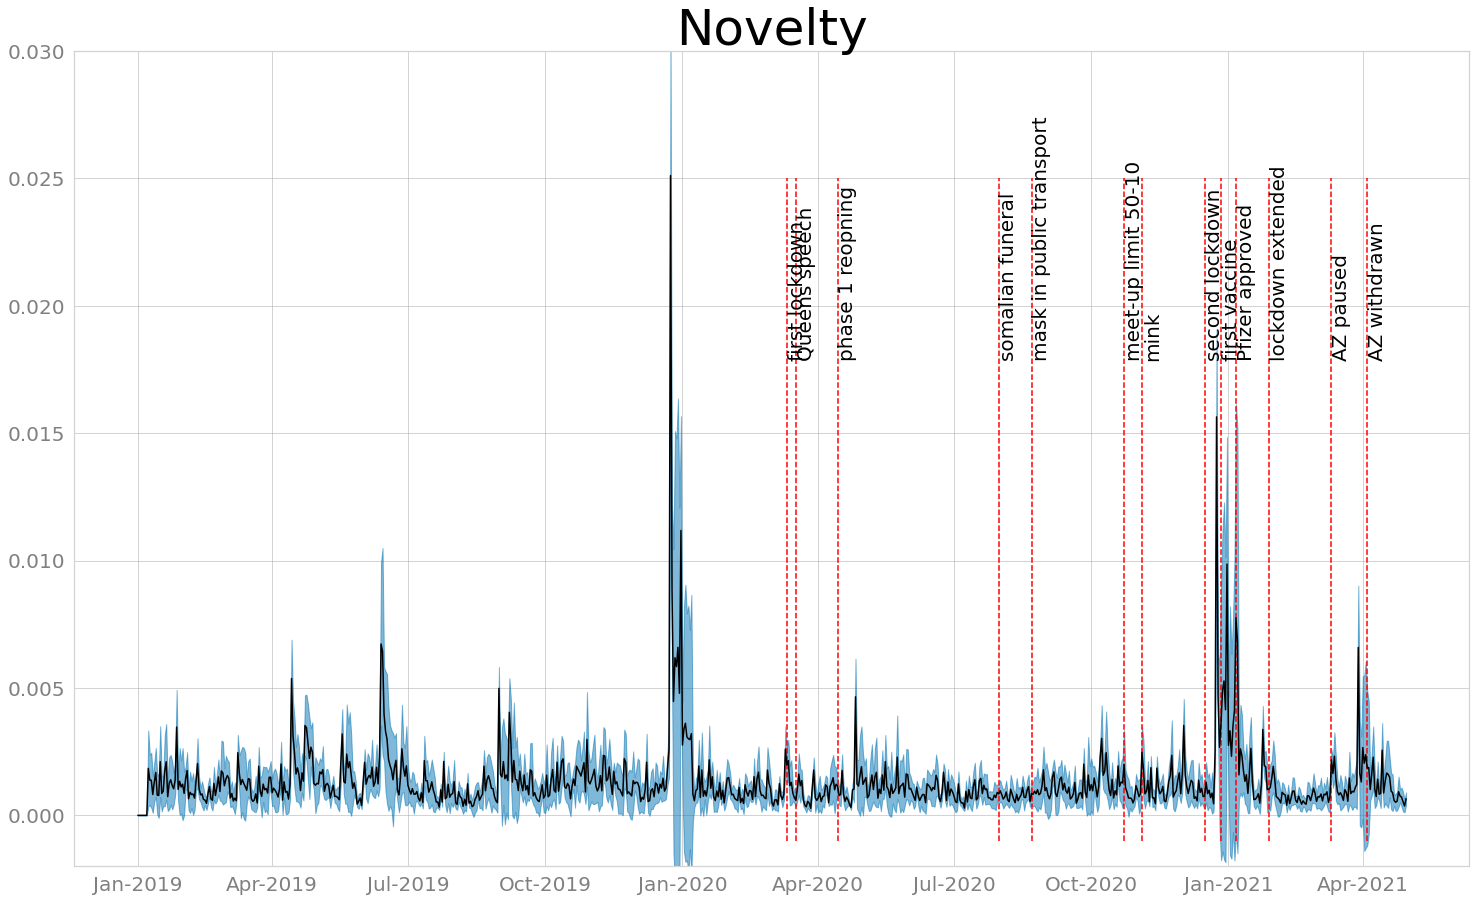

In [7]:
fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

x = df['date']
y = df['novelty']
error = df['nsigma']

plt.plot(x, y, color=palette[0])
plt.fill_between(x, y-error, y+error,
                 alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

for event, time in event_dict.items():
    plt.vlines(x = time, ymax=0.025, ymin=-0.001, colors='Red',
               label = event, linestyle = 'dashed')
    plt.text(x = time+ dt.timedelta(hours=12), y = 0.018,
         s = event,
         fontdict = dict(color="black",size=20),
        #  bbox = dict(facecolor="white",alpha=0.5),
         rotation=90)

fig, ax1 = set_late_plot_settings(if_dates = True)
ax1.set_title("Novelty", fontdict = {'fontsize':50}, color = "Black")
# plt.xticks(rotation=60)
plt.ylim((-0.002,0.03))

# plt.savefig('../fig/recol_novelty_events.png')
plt.show()

In [7]:
def plot_novelty_resonance(df, label=None, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]


    fig, (ax1, ax2) = plt.subplots(2, figsize=a4_dims)
    sns.set(font_scale = 2)

    # resonance
    xr = df['date']
    yr = df['resonance']
    errorr = df['rsigma']

    ax1.plot(xr, yr, color=palette[0])
    ax1.fill_between(xr, yr-errorr, yr+errorr,
                    alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

    # for event, time in event_dict.items():
    #     ax1.vlines(x = time, ymax=0.02, ymin=-0.015, colors='Red',
    #                label = event, linestyle = 'dashed')
    #     ax1.text(x = time, y = 0.01,
    #          s = event,
    #          fontdict = dict(color="black",size=15),
    #         #  bbox = dict(facecolor="white",alpha=0.5),
    #          rotation=90)


    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    # Define the date format
    ax1.xaxis_date()
    date_form = mdates.DateFormatter("%b-%Y")
    ax1.xaxis.set_major_formatter(date_form)
    if label:
        ax1.set_title(f"Resonance no {label}", fontdict = {'fontsize':30}, color = "Black")
    else:
      ax1.set_title(f"Resonance", fontdict = {'fontsize':30}, color = "Black")  

    # novelty
    xn = df['date']
    yn = df['novelty']
    errorn = df['nsigma']

    ax2.plot(xn, yn, color=palette[0])
    ax2.fill_between(xn, yn-errorn, yn+errorn,
                    alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

    # for event, time in event_dict.items():
    #     ax2.vlines(x = time, ymax=0.025, ymin=-0.002, colors='Red',
    #                label = event, linestyle = 'dashed')
    #     ax2.text(x = time, y = 0.018,
    #          s = event,
    #          fontdict = dict(color="black",size=15),
    #         #  bbox = dict(facecolor="white",alpha=0.5),
    #          rotation=90)

    ax2.set(xlabel="", ylabel = "")
    ax2.xaxis.get_label().set_fontsize(40)
    ax2.yaxis.get_label().set_fontsize(40)

    ax2.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    # Define the date format
    ax2.xaxis_date()
    date_form = mdates.DateFormatter("%b-%Y")
    ax2.xaxis.set_major_formatter(date_form)
    if label:
        ax2.set_title(f"Novelty no {label}", fontdict = {'fontsize':30}, color = "Black")
    else:
      ax2.set_title(f"Novelty", fontdict = {'fontsize':30}, color = "Black")

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

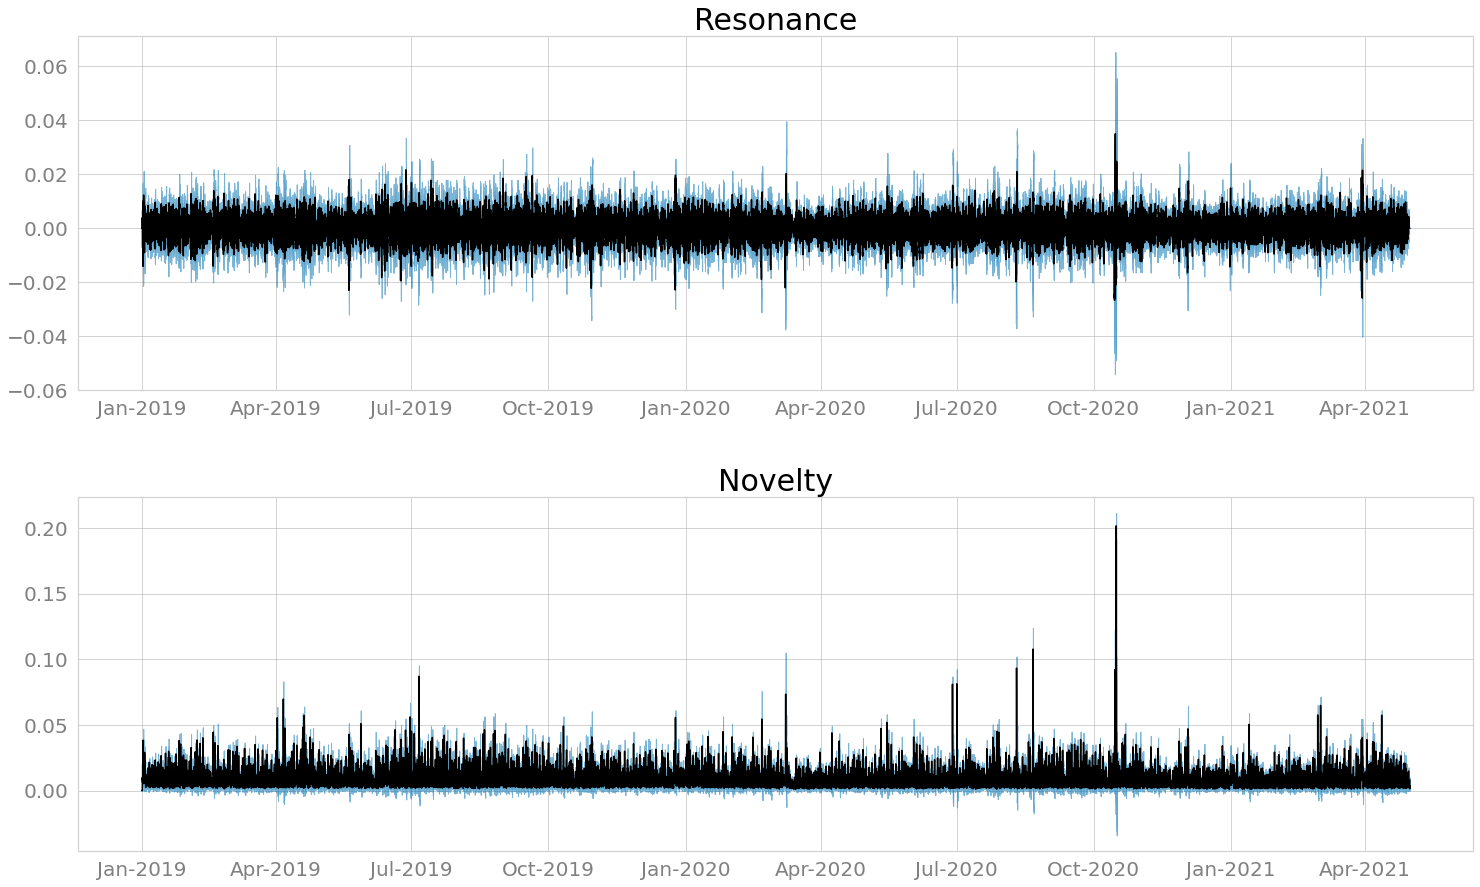

In [15]:
plot_novelty_resonance(df) #, save_fig=True, plot_name='../fig/recol_W7_res_nov.png')

## Emotions driving the effect

In [13]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [6]:
all_emo_dfs = []
for label in labels:
    filename = os.path.join("..", "idmdl", f"tweets_emotion_no_{label[:4]}.csv")
    df = pd.read_csv(filename)
    df["date"] = pd.to_datetime(df["date"])
    all_emo_dfs.append(df)
    # plot_novelty_resonance(df, label)
    # plot_novelty_resonance(df, label, save_fig=True, plot_name=f"../fig/res_nov_no_{label[:4]}.png")
all_emo = pd.read_csv(os.path.join("..", "idmdl", "tweets_emotion_date.csv"))
all_emo["date"] = pd.to_datetime(all_emo["date"])
all_emo_dfs.append(all_emo)



In [41]:
def plot_all_excluded(dfs:list, measure:str, ymin:float, ymax:float, stacked=False, 
                      save_fig=False, plot_name=None, labels = [
            "Glæde/Sindsro",
            "Tillid/Accept",
            "Forventning/Interrese",
            "Overasket/Målløs",
            "Vrede/Irritation",
            "Foragt/Modvilje",
            "Sorg/trist",
            "Frygt/Bekymret",
            "All emotions included"
        ]):
    fig, axs = plt.subplots(3,3, figsize = (20,10))
    labelsize = 8
    matplotlib.rc('xtick', labelsize=labelsize) 
    matplotlib.rc('ytick', labelsize=labelsize) 
   
    themes.theme_minimal(grid=True, ticks=False, fontsize=10)
    k = 0
    j = 0
    for i, emotion in enumerate(labels):
        # ax1 = fig.add_subplot()
        x = dfs[i]["date"]
        y = dfs[i][measure]
        if stacked:
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[1], label=emotion)
            x = dfs[-1]["date"]
            y = dfs[-1][measure]
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[0], label='all')
        else:
            axs[k, j].plot(x, y, label = f'{emotion} excluded', linewidth = 0.5)
        axs[k, j].xaxis.set_major_locator(plt.MaxNLocator(5))
        axs[k, j].axis(ymin=ymin, ymax=ymax)
        axs[k, j].set_title(f'{emotion} excluded', fontdict = {"fontsize": 13}, color = "Black")
        # if stacked:
        #     axs[k, j].legend()
        if k == 2 and j == 2:
            axs[k, j].set_title(f'{emotion}', fontdict = {"fontsize": 13}, color = "Black")
        j += 1
        if j > 2:
            k += 1
            j = 0
    fig.suptitle(measure.capitalize(), fontsize=30, color="Black")
    plt.subplots_adjust(hspace=0.3)

    if save_fig:
        plt.savefig(plot_name)
    plt.show()

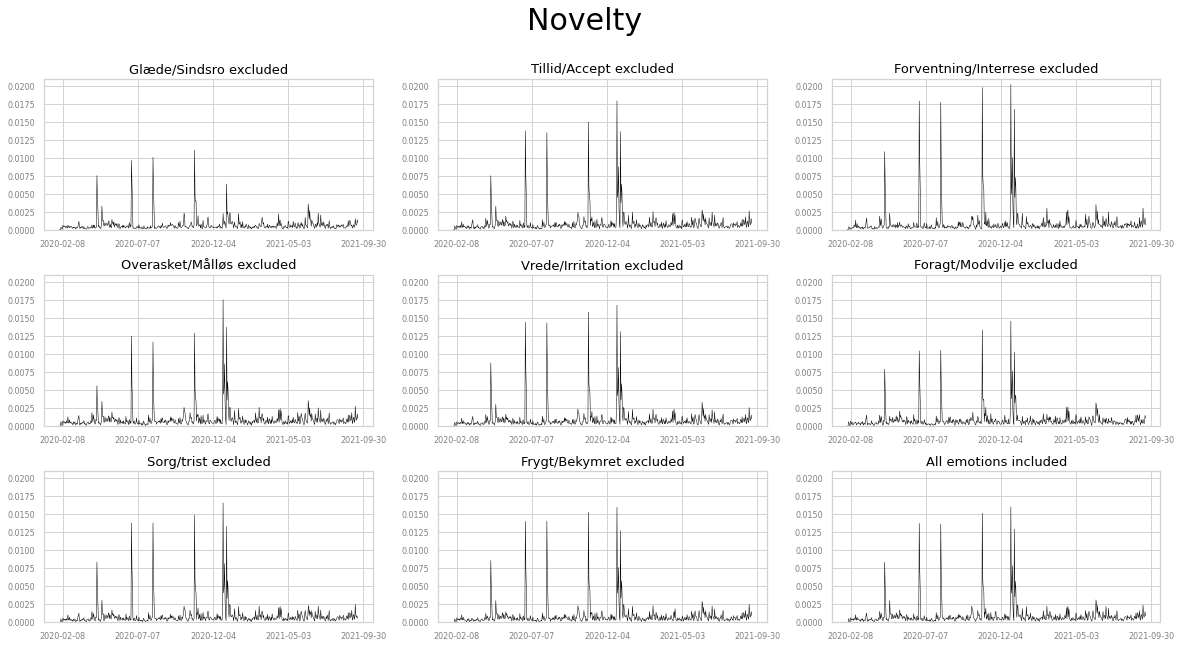

In [11]:
plot_all_excluded(all_emo_dfs, "novelty", ymin=0, ymax=0.021)#, save_fig=True, plot_name=f"../fig/novelty_emotions_excluded_all.png") 

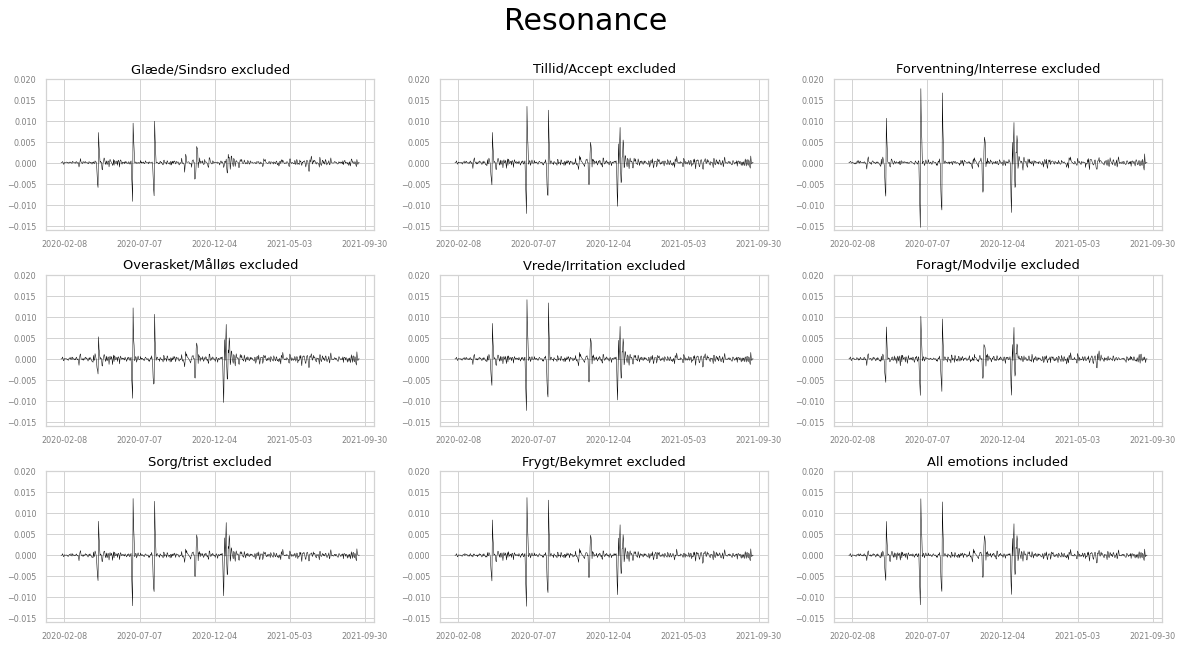

In [12]:
plot_all_excluded(all_emo_dfs, "resonance", ymin=-0.016, ymax=0.02)#, save_fig=True, plot_name=f"../fig/resonance_emotions_excluded_all.png")

In [24]:
for i, emo in enumerate(labels):
    two_emo_dfs = [all_emo_dfs[-1], all_emo_dfs[i]]
    two_labels = ['all', emo]

    fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

    for emo_label, df in zip(two_labels,two_emo_dfs):
        x = df['date']
        y = df['resonance']
        error = df['rsigma']
        if emo_label == 'all':
            plt.plot(x, y, color=palette[0], label=emo_label)
        else:
            plt.plot(x, y, color=palette[1], label=emo_label, alpha=0.5)
    # plt.fill_between(x, y-error, y+error,
    #                  alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

    fig, ax1 = set_late_plot_settings(if_dates = True)
    ax1.set_title("Resonance", fontdict = {'fontsize':50}, color = "Black")
    # plt.xticks(rotation=60)
    # plt.ylim((-0.002,0.03))
    plt.legend()

    plt.show()

NameError: name 'labels' is not defined

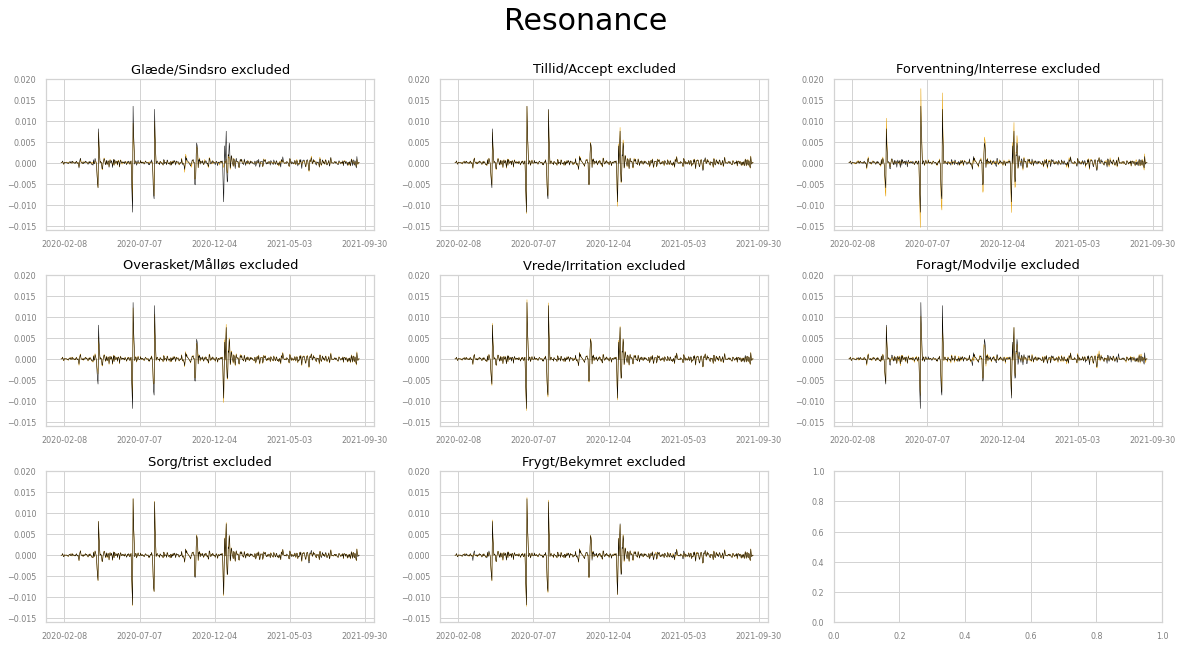

In [42]:
plot_all_excluded(all_emo_dfs, "resonance", ymin=-0.016, ymax=0.02, labels=labels, stacked=True)

### Compare the signal (recollected tweets)

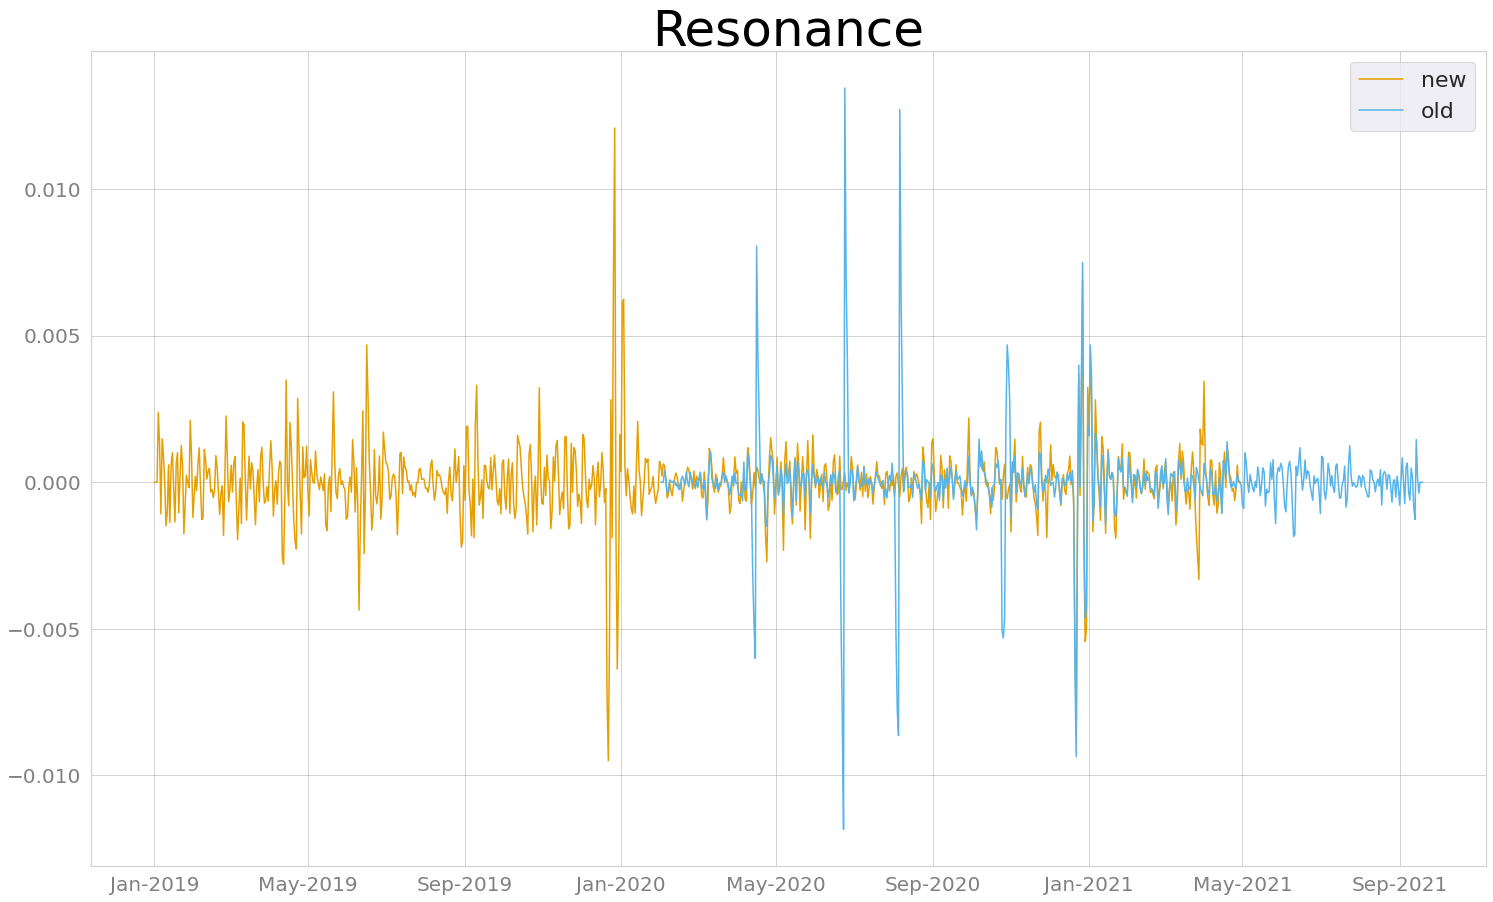

In [13]:
filename = os.path.join("..","idmdl", "tweets_recol_emotion_date.csv")
df_new = pd.read_csv(filename)
df_new["date"] = pd.to_datetime(df_new["date"])
filename = os.path.join("..","idmdl", "tweets_emotion_date.csv")
df_old = pd.read_csv(filename)
df_old["date"] = pd.to_datetime(df_old["date"])

two_dfs = [df_new, df_old]
two_labels = ['new', 'old']

fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

for i, (emo_label, df) in enumerate(zip(two_labels,two_dfs), start=1):
    x = df['date']
    y = df['resonance']
    plt.plot(x, y, color=palette[i], label=emo_label)

fig, ax1 = set_late_plot_settings(if_dates = True)
ax1.set_title("Resonance", fontdict = {'fontsize':50}, color = "Black")
plt.legend()

plt.show()